In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [4]:
print(faces.images.shape)

(1348, 62, 47)


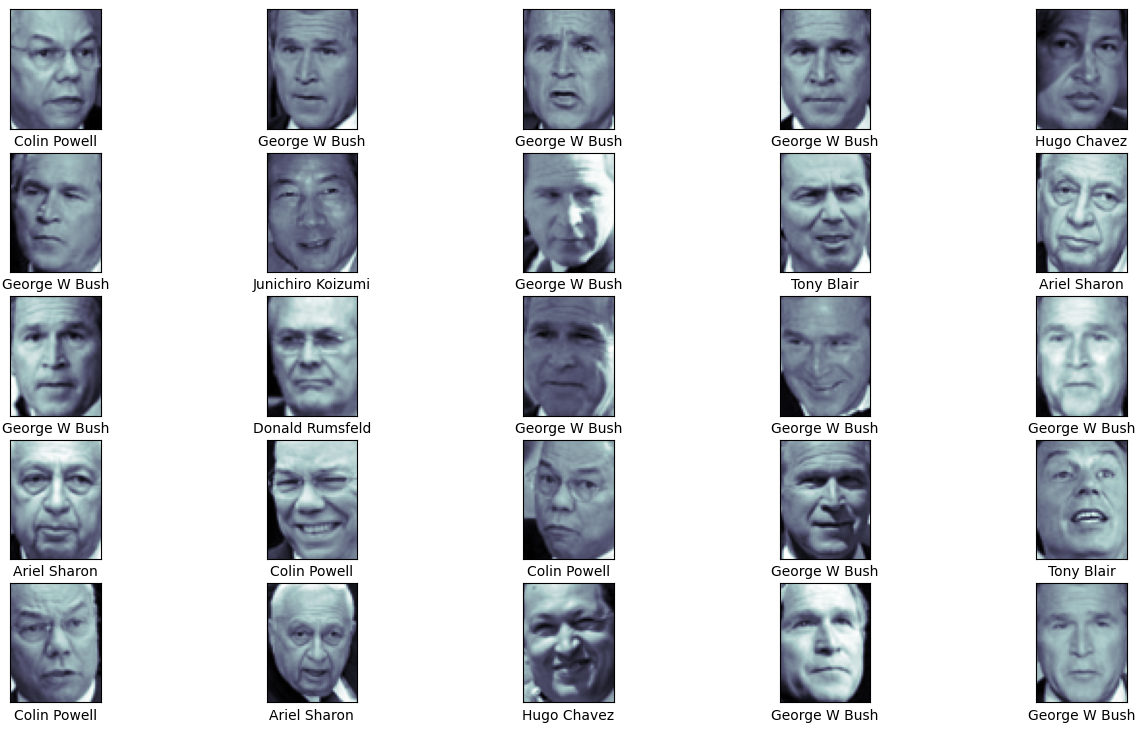

In [5]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [24]:
pca = RandomizedPCA(n_components=500, whiten=True, random_state=42)     # random_state hemos puesto 42 (pero se lo ha inventado)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [27]:
from sklearn.model_selection import GridSearchCV 

In [28]:
param_grid = {
    "svc__C":[0.001,0.01,0.1,1,5,10,50,500,5000],
    "svc__gamma":[0.000001,0.00001,0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1,1]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

CPU times: user 13min 3s, sys: 8min 7s, total: 21min 10s
Wall time: 13min 1s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=500, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 500, 5000],
                         'svc__gamma': [1e-06, 1e-05, 0.0001, 0.0005, 0.001,
                                        0.005, 0.01, 0.1, 1]})

In [29]:
print(grid.best_params_) 

{'svc__C': 10, 'svc__gamma': 0.0001}


In [30]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágenes (incorrectas en rojo)')

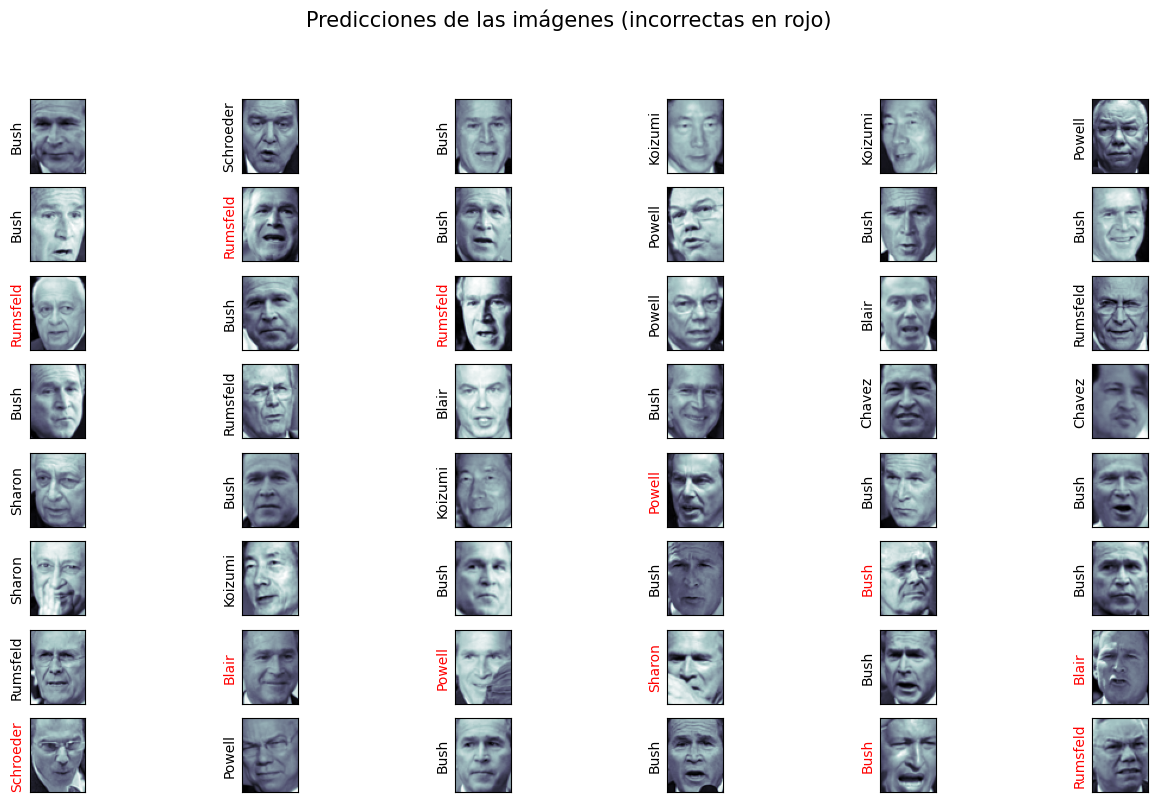

In [31]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i]==Ytest[i] else "red")

fig.suptitle("Predicciones de las imágenes (incorrectas en rojo)", size = 15)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(Ytest, yfit, target_names = faces.target_names)) 

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.67      0.57        15
     Colin Powell       0.76      0.82      0.79        68
  Donald Rumsfeld       0.57      0.68      0.62        31
    George W Bush       0.86      0.75      0.80       126
Gerhard Schroeder       0.53      0.70      0.60        23
      Hugo Chavez       0.85      0.55      0.67        20
Junichiro Koizumi       0.91      0.83      0.87        12
       Tony Blair       0.73      0.71      0.72        42

         accuracy                           0.74       337
        macro avg       0.71      0.71      0.71       337
     weighted avg       0.76      0.74      0.74       337



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
mat = confusion_matrix(Ytest, yfit)

In [36]:
import seaborn as sns; sns.set()

<Axes: >

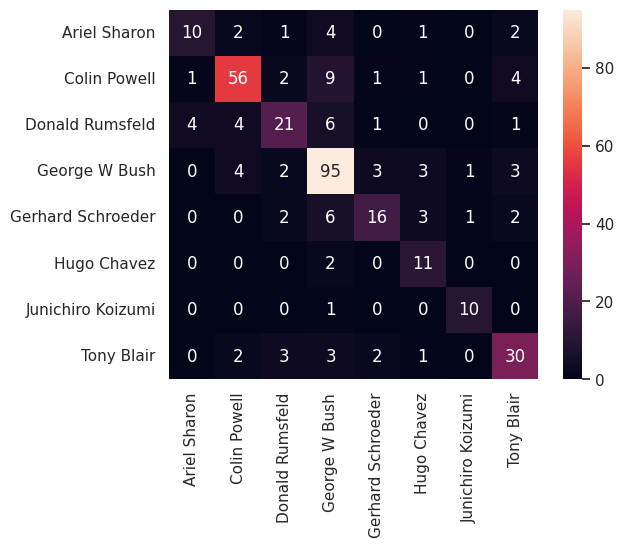

In [37]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=faces.target_names, yticklabels=faces.target_names )